## Linear Regression

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fire_data = pd.read_excel('../Dataset/fire_theft.xls')
fire_data.head(5)

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


#### Model Attributes
model: w\*X + b<br>
loss function = (y - ypred)^2

In [3]:
import tensorflow as tf

In [30]:
input_data = fire_data['X']
labels = fire_data['Y']
print input_data.shape,labels.shape

(42,) (42,)


In [31]:
def huber_loss(predictions,labels,delta=1.0):
    difference = tf.abs(labels - predictions)
    condition = tf.less(difference, delta)
    small_res = 0.5*tf.square(difference)
    large_res = difference + 0.5*tf.square(delta)
    return tf.where(condition,small_res,large_res)

In [32]:
## Defining the placeholders for data and labels
X = tf.placeholder(tf.float32,name="X")
y = tf.placeholder(tf.float32,name="y")

In [33]:
## Defining the variables for weights and biases
W = tf.Variable(0.0,name="W")
b = tf.Variable(1.0,name="b")
print W
print b

Tensor("W_1/read:0", shape=(), dtype=float32)
Tensor("b_1/read:0", shape=(), dtype=float32)


In [34]:
## Constructing the model
ypred = tf.add(tf.multiply(X,W),b)

In [35]:
## Specifying the loss function
loss = tf.square(y - ypred,name="loss")

In [38]:
## Specifying the optimiser
optimizer_squared = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
optimizer_huber = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(huber_loss(ypred,y))

In [39]:
## Training the model
n_samples = input_data.shape[0]
init = tf.global_variables_initializer()
y_loss = []
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('./graphs',sess.graph)
    for i in range(1,101):
        total_loss_sq = 0
        total_loss_huber = 0
        for index in range(n_samples):
            _,l = sess.run([optimizer_squared,loss],feed_dict=dict({X:input_data[index],y:labels[index]}))
            _,huber = sess.run([optimizer_huber,loss],feed_dict=dict({X:input_data[index],y:labels[index]}))
            total_loss_sq += l
            total_loss_huber += huber
        if i%10 == 0:
            print 'Epoch: {} Squared Loss: {}'.format(i,total_loss_sq/n_samples)
            print 'Epoch: {} Huber Loss: {}'.format(i,total_loss_huber/n_samples)
        y_loss.append(total_loss_sq)
    w_cap,b_cap = sess.run([W,b])
writer.close()

Epoch: 10 Squared Loss: 1857.67721017
Epoch: 10 Huber Loss: 2548.28823195
Epoch: 20 Squared Loss: 1709.47616658
Epoch: 20 Huber Loss: 2306.805529
Epoch: 30 Squared Loss: 1606.84905499
Epoch: 30 Huber Loss: 2138.13555479
Epoch: 40 Squared Loss: 1534.44548424
Epoch: 40 Huber Loss: 2018.00743315
Epoch: 50 Squared Loss: 1482.50711303
Epoch: 50 Huber Loss: 1930.88734063
Epoch: 60 Squared Loss: 1444.82408537
Epoch: 60 Huber Loss: 1867.16218248
Epoch: 70 Squared Loss: 1417.3796901
Epoch: 70 Huber Loss: 1820.49275349
Epoch: 80 Squared Loss: 1397.16172973
Epoch: 80 Huber Loss: 1785.97921925
Epoch: 90 Squared Loss: 1382.10152024
Epoch: 90 Huber Loss: 1760.19977589
Epoch: 100 Squared Loss: 1370.82189402
Epoch: 100 Huber Loss: 1740.84032996


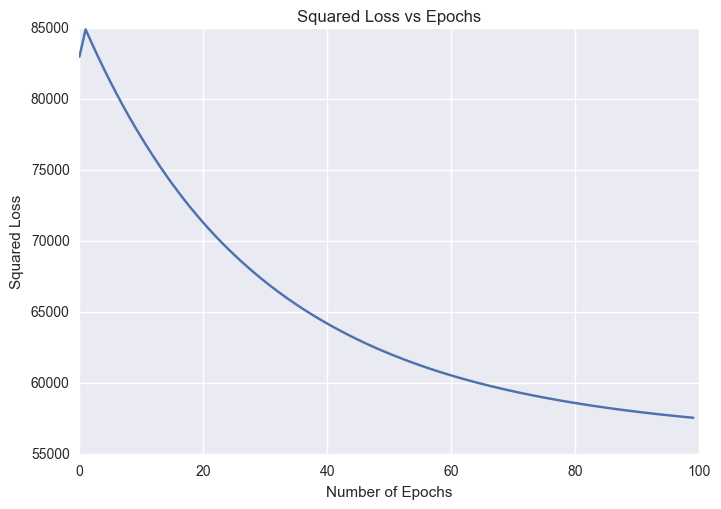

In [40]:
plt.plot(y_loss)
plt.title('Squared Loss vs Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Squared Loss')

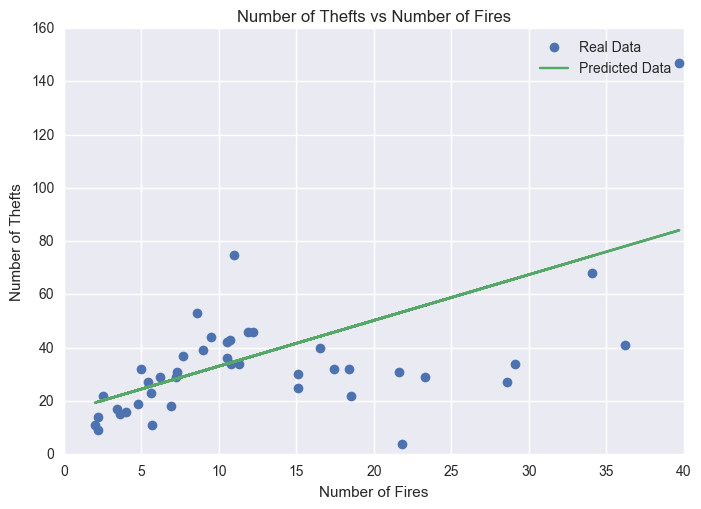

In [41]:
#!tensorboard --logdir='./graphs' --port=6006
plt.plot(input_data,labels,'o',label="Real Data")
plt.plot(input_data,w_cap*input_data+b_cap,label="Predicted Data")
plt.legend()
plt.title('Number of Thefts vs Number of Fires')
plt.xlabel('Number of Fires')
plt.ylabel('Number of Thefts')

## Logistic Regression

In [42]:
mnist_data = pd.read_csv('../Dataset/MNIST/train.csv')
mnist_data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Model Attributes
model: logit = w\*X + b<br>
ypred = sigmoid(logit)<br>
loss: crossentropy(y,ypred)

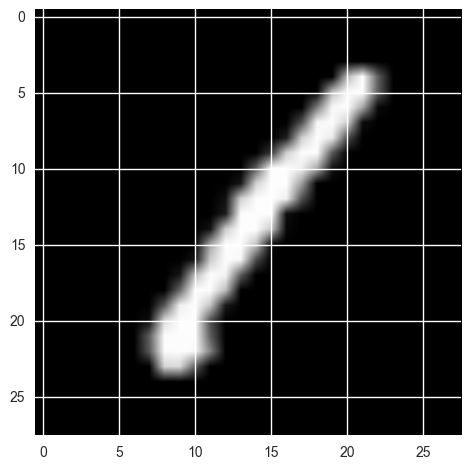

In [52]:
plt.imshow(mnist_data.iloc[0,1:].values.reshape(28,28),cmap='gray')

In [56]:
from keras.utils.np_utils import to_categorical
labels = to_categorical(mnist_data['label'])
input_data = mnist_data.iloc[:,1:]
print input_data.shape,labels.shape

(42000, 784) (42000, 10)


In [57]:
## Defining the placeholders for data
batch_size = 128
X = tf.placeholder(tf.float32,shape=[batch_size,784],name="X")
y = tf.placeholder(tf.float32,shape=[batch_size,10],name="y")

In [60]:
## Defining the variables for weights and biases
W = tf.Variable(tf.random_normal([784,10]),name="weights")
b = tf.Variable(tf.ones((batch_size,10)),name="biases")

In [62]:
## Predicting image class using model
logits = tf.add(tf.matmul(X,W),b)
ypred = tf.sigmoid(logits)

In [68]:
## Loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits)
loss = tf.reduce_mean(entropy)

In [67]:
## Creating the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [81]:
## Training the model
init = tf.global_variables_initializer()
y_loss = []
n_examples = input_data.shape[0]
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('./graphs',sess.graph)
    total_loss = 0
    for i in range(n_examples/batch_size):
        next_batch = (i+1)*batch_size
        X_batch,y_batch = input_data.iloc[i*batch_size:next_batch,:],labels[i*batch_size:next_batch,:]
        _,l = sess.run([optimizer,loss],feed_dict={X:X_batch,y:y_batch})
        total_loss += l/batch_size
        if i % 40 == 0:
            print 'Epoch: {} Loss: {}'.format(i,total_loss)
        y_loss.append(total_loss)

Epoch: 0 Loss: 25.8593463898
Epoch: 40 Loss: 2585.62388039
Epoch: 80 Loss: 3493.76508522
Epoch: 120 Loss: 4356.06410313
Epoch: 160 Loss: 4992.82860851
Epoch: 200 Loss: 5890.40502644
Epoch: 240 Loss: 6564.73568296
Epoch: 280 Loss: 7145.30677843
Epoch: 320 Loss: 7666.85940933


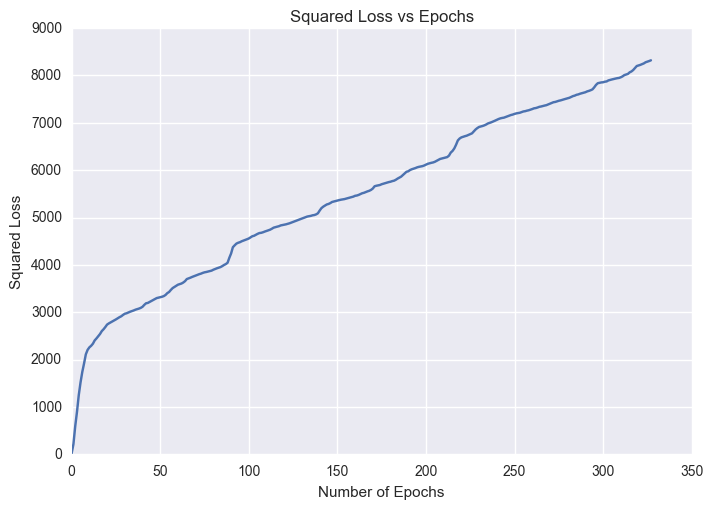

In [80]:
plt.plot(y_loss)
plt.title('Squared Loss vs Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Squared Loss')